<a href="https://colab.research.google.com/github/Harshita418/Count-Nodes/blob/master/Copy_of_FR%2BFL_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 97kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=2403163e373347de4c369bb5fa1c7118241bc1554c5b7aade1c0a80ebc54f7df
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
!mkdir known
!wget https://upload.wikimedia.org/wikipedia/commons/6/6e/Shah_Rukh_Khan_graces_the_launch_of_the_new_Santro.jpg -O known/srk_5years.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/b/b6/Deepika_Padukone_Cannes_2018_%28cropped%29.jpg -O known/deepika.jpg

--2020-05-25 08:09:14--  https://upload.wikimedia.org/wikipedia/commons/6/6e/Shah_Rukh_Khan_graces_the_launch_of_the_new_Santro.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159690 (156K) [image/jpeg]
Saving to: ‘known/srk_5years.jpg’

known/srk_5years.jp 100%[===================>] 155.95K  --.-KB/s    in 0.005s  

2020-05-25 08:09:14 (30.9 MB/s) - ‘known/srk_5years.jpg’ saved [159690/159690]

--2020-05-25 08:09:23--  https://upload.wikimedia.org/wikipedia/commons/b/b6/Deepika_Padukone_Cannes_2018_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226183 (221K) [image/jpeg]
Saving t

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving p.jpg to p.jpg


In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
def read_img(path):
  img=cv2.imread(path)
  (h,w)=img.shape[:2]
  width=500
  ratio=width/float(w)
  height=int(h*ratio)
  return cv2.resize(img,(width,height))
 
known_encodings=[]
known_names=[]
known_dir='known'
 
for file in os.listdir(known_dir):
  img=read_img(known_dir + '/' + file)
  img_enc=face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])
 
unknown_dir='unknown'
for file in os.listdir(unknown_dir):
  print('processing',file)
  img=read_img(unknown_dir + '/' + file)
  img_enc=face_recognition.face_encodings(img)[0]
  results=face_recognition.compare_faces(known_encodings,img_enc)
 
  for i in range(len(results)):
    if results[i]:
      name=known_names[i]
      (top,right,bottom,left)=face_recognition.face_locations(img)[0]
      cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),2)
      cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,1,(0,0,255),1)
      cv2_imshow(img)

processing .ipynb_checkpoints


AttributeError: ignored

In [ ]:
import cv2

# used for accessing url to download files
import urllib.request as urlreq

# used to access local directory
import os

# used to plot our images
import matplotlib.pyplot as plt

# used to change image size
from pylab import rcParams



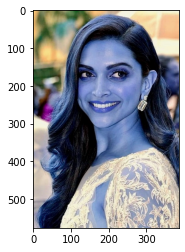

In [ ]:
# save picture's url in pics_url variable
pics_url = "https://upload.wikimedia.org/wikipedia/commons/b/b6/Deepika_Padukone_Cannes_2018_%28cropped%29.jpg"

# save picture's name as pic
pic = "image.jpg"

# download picture from url and save locally as image.jpg
urlreq.urlretrieve(pics_url, pic)

# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)

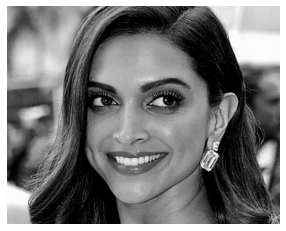

In [ ]:
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(image_rgb)

# set dimension for cropping image
x, y, width, depth = 10,40, 950, 300
image_cropped = image_rgb[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
image_template = image_cropped.copy()

# convert image to Grayscale
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# remove axes and show image
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")


File downloaded
Faces:
 [[ 74  54 205 205]]


Text(0.5, 1.0, 'Face Detection')

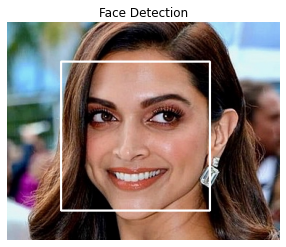

In [ ]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')


File downloaded


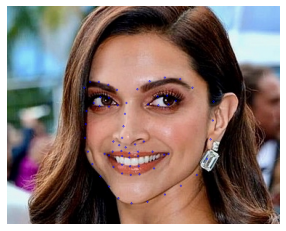

In [ ]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"
 
# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"
 
# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")
 
# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)
 
# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)
 
for landmark in landmarks:
    for x,y in landmark[0]:
        # display landmarks on "image_cropped"
        # with white colour in BGR and thickness 1
        cv2.circle(image_cropped, (x, y), 1, (0, 0, 255), 1)
plt.axis("off")
plt.imshow(image_cropped)